In [59]:
#IMPORT 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import gensim.downloader as api
import gensim.downloader
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import export_graphviz
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import graphviz
import gensim
from gensim.models.nmf import Nmf
from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaMulticore
from gensim.models.ldamodel import LdaModel
import csv
import pickle
import numpy as np
import os
import pandas as pd
from scipy import spatial
import operator
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.manifold import TSNE


In [60]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [61]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [62]:
currdir=os.getcwd()
print(currdir)

/home/bigdata-01QYD/s278561/270005/RESULTS


In [5]:
path="/NMF/"

In [63]:
name="Spark"
tipo="MESSAGE"
method=tipo

In [64]:
df_log=pd.read_csv(currdir+path+f"{name}/{name}_NMF_{tipo}.csv")

In [65]:
print(len(df_log))

17820


In [66]:
final_df0=df_log[df_log['k']>=30]
#final_df0=final_df0[final_df0['coherence']>0.7]
#final_df0=final_df0[final_df0['kappa']==0.1]
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(len(final_df0))
print(final_df0.head(50))

7920
       seed     k  kappa  coherence
6765   38.0  31.0   0.01   0.727363
105     1.0  31.0   0.01   0.717763
6235   35.0  33.0   0.01   0.704493
1560    9.0  34.0   0.01   0.703634
1200    7.0  34.0   0.01   0.701911
13825  77.0  39.0   0.01   0.701904
4080   23.0  34.0   0.01   0.700037
7495   42.0  33.0   0.01   0.699244
8565   48.0  31.0   0.01   0.696479
1925   11.0  35.0   0.01   0.695611
17415  97.0  37.0   0.01   0.694853
6580   37.0  30.0   0.01   0.694359
12880  72.0  30.0   0.01   0.694336
6960   39.0  34.0   0.01   0.691689
14335  80.0  33.0   0.01   0.691416
1225    7.0  39.0   0.01   0.691279
13255  74.0  33.0   0.01   0.690523
12910  72.0  36.0   0.01   0.690371
13250  74.0  32.0   0.01   0.690210
1950   11.0  40.0   0.01   0.689827
13450  75.0  36.0   0.01   0.688657
2445   14.0  31.0   0.01   0.688653
9840   55.0  34.0   0.01   0.688466
17590  98.0  36.0   0.01   0.687203
16865  94.0  35.0   0.01   0.687079
8790   49.0  40.0   0.01   0.686793
2295   13.0  37.0   0.0

In [67]:
final_df0=df_log
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(len(final_df0))
print(final_df0.head(50))

17820
       seed     k  kappa  coherence
721     5.0  10.0   0.05   0.740162
7561   43.0  10.0   0.05   0.738365
3695   21.0  29.0   0.01   0.734584
8710   49.0  24.0   0.01   0.729002
1621   10.0  10.0   0.05   0.728828
6765   38.0  31.0   0.01   0.727363
186     2.0  11.0   0.05   0.725923
16475  92.0  29.0   0.01   0.725841
10981  62.0  10.0   0.05   0.724555
17015  95.0  29.0   0.01   0.722399
9785   55.0  23.0   0.01   0.720211
12640  71.0  18.0   0.01   0.718808
105     1.0  31.0   0.01   0.717763
1086    7.0  11.0   0.05   0.717379
11531  65.0  12.0   0.05   0.716934
1261    8.0  10.0   0.05   0.716121
6555   37.0  25.0   0.01   0.715196
5401   31.0  10.0   0.05   0.710200
4321   25.0  10.0   0.05   0.710015
4322   25.0  10.0   0.10   0.709580
366     3.0  11.0   0.05   0.709554
10631  60.0  12.0   0.05   0.708806
13175  74.0  17.0   0.01   0.707692
13141  74.0  10.0   0.05   0.706513
15121  85.0  10.0   0.05   0.705440
6235   35.0  33.0   0.01   0.704493
1560    9.0  34.0   0.

In [11]:
final_df0=df_log[df_log['k']==17]
#final_df0=final_df0[final_df0['kappa']==0.1]
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(len(final_df0))
print(final_df0.head(50))

250
       seed     k  kappa  coherence
484     3.0  17.0   1.00   0.873533
10274  47.0  17.0   1.00   0.854097
10273  47.0  17.0   0.50   0.853565
5824   27.0  17.0   1.00   0.850159
5823   27.0  17.0   0.50   0.849033
9829   45.0  17.0   1.00   0.846562
21843  99.0  17.0   0.50   0.846545
9828   45.0  17.0   0.50   0.843248
21844  99.0  17.0   1.00   0.841504
7158   33.0  17.0   0.50   0.840582
2709   13.0  17.0   1.00   0.840469
20509  93.0  17.0   1.00   0.839784
20508  93.0  17.0   0.50   0.837838
16504  75.0  17.0   1.00   0.836193
10717  49.0  17.0   0.10   0.835061
11164  51.0  17.0   1.00   0.833649
20953  95.0  17.0   0.50   0.832645
20954  95.0  17.0   1.00   0.832645
15169  69.0  17.0   1.00   0.832304
483     3.0  17.0   0.50   0.831343
16059  73.0  17.0   1.00   0.825482
20952  95.0  17.0   0.10   0.825429
2708   13.0  17.0   0.50   0.824111
3596   17.0  17.0   0.05   0.823830
2706   13.0  17.0   0.05   0.823608
6714   31.0  17.0   1.00   0.821754
20064  91.0  17.0   1.00

# BEST MODEL

In [70]:
print("LOAD DATA")
filename = f"/home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/{name}/{method}/{name}_InputData_{method}.txt"
print(f"READ FILE: {filename}")
data=[]
with open(filename, 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter='\t')
    for i,row in enumerate(rows):
        tmp = row[0].replace("[", "")
        tmp = tmp.replace("]", "")
        tmp = tmp.replace("'", "")
        row_l = list(tmp.split(", "))
        if i<10:
            print(i, row_l)
        data.append(row_l)
print(len(data))
print("END LOAD DATA")

LOAD DATA
READ FILE: /home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/Spark/MESSAGE/Spark_InputData_MESSAGE.txt
0 ['attempt', 'commit', 'attempt commit']
1 ['block', 'manager', 'stop', 'block manager', 'manager stop', 'block manager stop']
2 ['block', 'store', 'byte', 'memory', 'block store', 'store byte', 'byte memory', 'block store byte', 'store byte memory']
3 ['block', 'store', 'value', 'memory', 'block store', 'store value', 'value memory', 'block store value', 'store value memory']
4 ['change', 'modify', 'acls', 'yarn', 'curi', 'change modify', 'modify acls', 'acls yarn', 'yarn curi', 'change modify acls', 'modify acls yarn', 'acls yarn curi']
5 ['change', 'view', 'acls', 'yarn', 'curi', 'change view', 'view acls', 'acls yarn', 'yarn curi', 'change view acls', 'view acls yarn', 'acls yarn curi']
6 ['connect', 'driver', 'connect driver']
7 ['create', 'local', 'directory', 'create local', 'local directory', 'create local directory']
8 ['delete', 'directory', 'delete directory']
9 [

In [71]:
id2word=corpora.Dictionary(data)
corpus=[id2word.doc2bow(word) for word in data]
print(len(corpus), len(id2word))

45 266


In [72]:
f=open(f"/home/bigdata-01QYD/s278561/270005/RESULTS/INPUT/{name}/{method}/{name}_w2vdict_{method}.pkl","rb")
modelW2V=pickle.load(f)#Word2Vec.load(pathname+"WORD2VEC/word2vec_SPLIT.model")
#print(modelW2V)
print(type(modelW2V))
#print(modelW2V.keys())
print(len(modelW2V.keys()))

<class 'dict'>
266


## NMF


In [53]:
final_df0=df_log[df_log['k']==30]
final_df0=final_df0[final_df0['coherence']<=0.77]
final_df0=final_df0.sort_values(by=['coherence'], ascending=False)
print(len(final_df0))
print(final_df0.head(50))

233
       seed     k  kappa  coherence
1881    9.0  30.0   0.05   0.769600
14341  65.0  30.0   0.05   0.766512
19236  87.0  30.0   0.05   0.765588
7667   35.0  30.0   0.10   0.764267
3216   15.0  30.0   0.05   0.762900
11671  53.0  30.0   0.05   0.762655
4552   21.0  30.0   0.10   0.761314
4553   21.0  30.0   0.50   0.761196
5887   27.0  30.0   0.10   0.760846
8559   39.0  30.0   1.00   0.760450
18794  85.0  30.0   1.00   0.760292
8557   39.0  30.0   0.10   0.760241
10336  47.0  30.0   0.05   0.760145
10339  47.0  30.0   1.00   0.758937
21906  99.0  30.0   0.05   0.758512
21016  95.0  30.0   0.05   0.757801
10337  47.0  30.0   0.10   0.756643
18346  83.0  30.0   0.05   0.756045
16121  73.0  30.0   0.05   0.754473
18793  85.0  30.0   0.50   0.754371
16124  73.0  30.0   1.00   0.753388
1436    7.0  30.0   0.05   0.751963
17904  81.0  30.0   1.00   0.751806
546     3.0  30.0   0.05   0.751747
17901  81.0  30.0   0.05   0.750557
4997   23.0  30.0   0.10   0.750231
8556   39.0  30.0   0.05

In [54]:
best_cohe=0
it=0
for index, row in final_df0.iterrows():
    print("-"*113)
    seed=int(row['seed'])
    kappa=float(row['kappa'])
    k=int(row['k'])
    best_nmf_model=Nmf(corpus=corpus, id2word=id2word, num_topics=k, random_state=seed, kappa=kappa, passes=20,eval_every=10)
    cm = CoherenceModel(model=best_nmf_model, dictionary=id2word, texts=data, coherence='c_v') #110
    coherence=cm.get_coherence()
    topics = best_nmf_model.show_topics(num_topics=k,num_words=20,formatted=False)
    topics_words=[]
    j=0
    for i in range(k):
        topic_words = dict(topics[i][1])
        topics_words.append(list(topic_words.keys()))
    w2v=[]
    for tw in topics_words:
        tmp=[]
        for el in tw:
            splits=el.split(" ")
            tmp.append("_".join(splits))
        #print(tmp)
        w2v.append(tmp)
    delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V, k)
    if delta_k==0 and coherence>best_cohe:
        best_cohe=coherence
        print(f"--> [BEST] k={k}, seed={seed}, kappa={kappa}, coherence={coherence}, to_drop={to_drop}")
    else:
        print(f"k={k}, seed={seed}, kappa={kappa}, coherence={coherence}, to_drop={to_drop}")
    it+=1
    if it>50:
        break

-----------------------------------------------------------------------------------------------------------------
Features to be dropped:[19, 26, 28] - 3 - max: [0.9716 0.9716 0.8796 0.8796 0.8542]
k=30, seed=9, kappa=0.05, coherence=0.7696000917934337, to_drop=[19, 26, 28]
-----------------------------------------------------------------------------------------------------------------
Features to be dropped:[23, 24] - 2 - max: [0.9661 0.9661 0.8892 0.8892 0.8242]
k=30, seed=65, kappa=0.05, coherence=0.7665124609749783, to_drop=[23, 24]
-----------------------------------------------------------------------------------------------------------------
Features to be dropped:[7, 10, 29] - 3 - max: [0.9512 0.9512 0.9393 0.9393 0.9029]
k=30, seed=87, kappa=0.05, coherence=0.7655875600266071, to_drop=[7, 10, 29]
-----------------------------------------------------------------------------------------------------------------
Features to be dropped:[5] - 1 - max: [0.9586 0.9586 0.8363 0.8363 0.

In [73]:
seed=77
k=39
kappa=0.01
best_nmf_model=Nmf(corpus=corpus, id2word=id2word, num_topics=k, random_state=seed, kappa=kappa, passes=20,eval_every=10)

In [74]:
metric10 = CoherenceModel(model=best_nmf_model, dictionary=id2word, texts=data, coherence='c_v',topn=10) # Initialize metric
coherence_cv10 = metric10.get_coherence()
metric15 = CoherenceModel(model=best_nmf_model, dictionary=id2word, texts=data, coherence='c_v',topn=15) # Initialize metric
coherence_cv15 = metric15.get_coherence()
metric = CoherenceModel(model=best_nmf_model, dictionary=id2word, texts=data, coherence='c_v',topn=20) # Initialize metric
coherence_cv = metric.get_coherence()
print(round(coherence_cv,5), round(coherence_cv15,5), round(coherence_cv10,5))

0.7019 0.77804 0.8446


In [24]:
topics = best_nmf_model.show_topics(num_topics=k,num_words=20,formatted=False)
topics_words=[]
j=0
for i in range(k):
    topic_words = dict(topics[i][1])
    topics_words.append(list(topic_words.keys()))

In [25]:
w2v=[]
for tw in topics_words:
    tmp=[]
    for el in tw:
        splits=el.split(" ")
        tmp.append("_".join(splits))
    #print(tmp)
    w2v.append(tmp)

In [26]:
delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V, k)
print(f"k={k}, coherence={coherence_cv}, to_drop={to_drop}")

Features to be dropped:[11, 14, 20] - 3 - max: [1.     1.     0.8957 0.8957 0.8767]
k=30, coherence=0.8172343877515335, to_drop=[11, 14, 20]


In [32]:
delta_k=1
while delta_k!=0:
    print("\nTO_DROP",to_drop)
    to_merge=TO_MERGE(similardf)
    merged_topics=MERGED_TOPICS(w2v,to_merge,to_drop,modelW2V)
    cm = CoherenceModel(topics=merged_topics, texts = data, corpus=corpus, dictionary=id2word, coherence = "c_v")
    coherence = cm.get_coherence() 
    print(f"COHERENCE - {len(merged_topics)}: {coherence}")
    w2v=merged_topics
    delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V, k)


TO_DROP [15, 24, 29, 30, 31, 33, 34, 41, 43]
TO_MERGE
[6, 29]
[10, 31, 34]
[12, 30]
[14, 15]
[18, 24]
[19, 43]
[30, 33]
[38, 41]
STARTING LEN 49
ADDING 0
ADDING 1
ADDING 2
ADDING 3
ADDING 4
ADDING 5
6 29
6 True
LIST PROCESSED [0]
LAST LIST PROCESSED [6, 29]
LEN NEW TP 20
ACT NEW TP ['io', 'reset', 'io_exception_connection', 'connection', 'exception_connection', 'reset_peer', 'peer', 'connection_reset', 'exception_connection_reset', 'connection_reset_peer', 'io_exception', 'interval', 'java', 'java_io', 'interval_cachereport', 'exception', 'fail_local', 'local_exception_java', 'exception_java_io', 'peer_host']
LEN TOT 20
CURR LEN MERGED_TOPICS: 6
CURR LEN MERGED_TOPICS: 7 AFTER ADDED 6
ADDING 7
ADDING 8
ADDING 9
10 31
10 34
10 True
LIST PROCESSED [0, 1]
LAST LIST PROCESSED [10, 31, 34]
LEN NEW TP 13
ACT NEW TP ['filter', 'static', 'user', 'user_filter', 'static_user', 'filter_context', 'add_filter_static', 'filter_static_user', 'static_user_filter', 'user_filter_context', 'context', 'a

In [19]:
def WORDCLOUD(best_k, best_nmf_model,k, flag=False):
    tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    offset=int(len(tmp)/best_k)
    #print(offset)
    cols=tmp[1::offset]
    #print(cols)

    cloud = WordCloud(background_color='white',
                      width=2500,
                      height=1800,
                      max_words=20,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = best_nmf_model.show_topics(num_topics=best_k,num_words=20,formatted=False)
    
    plotx=np.floor(np.sqrt(best_k))
    ploty=plotx
    flag=True
    while plotx*ploty < best_k:
        if flag:
            ploty+=1
            flag=False
        else:
            plotx+=1

    fig, axes = plt.subplots(int(plotx), int(ploty), figsize=(30,30), sharex=True, sharey=True)
    axes=axes.flatten()
    topics_words=[]
    j=0
    for i in range(best_k):
        fig.add_subplot(axes[i])
        topic_words = dict(topics[i][1])
        topics_words.append(list(topic_words.keys()))
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title(f'Topic {j+i}', fontdict=dict(size=16))
        plt.gca().axis('off')

    plt.subplots_adjust(wspace=5, hspace=5)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig(currdir+path+f"{name}_{tipo}_Best_Score_k={k}_WC.png")
    plt.show()
    
    return topics_words

In [20]:
def CLUSTERSIMILARITY(tp, modelW2V, k,flag=False):
    similarities2=[]
    max=[]
    for i,top_wrd in enumerate(tp):
        tmp=tp
        tmp_sim=[]
        curr_v=np.zeros(300)
        num_words=0
        for el in top_wrd:
            if el in modelW2V.keys():
                word_vec=modelW2V[el]
                curr_v+=word_vec
                num_words+=1
            else:
                print("MISSING:",el)
        curr_v=curr_v/num_words
        for j,other_topic in enumerate(tmp):
            act_v=np.zeros(300)
            num_words=0
            for el in other_topic:
                if el in modelW2V.keys():
                    word_vec=modelW2V[el]
                    act_v+=word_vec
                    num_words+=1
                else:
                    print("MISSING:",el)
            act_v=act_v/num_words
            similarity=spatial.distance.cosine(curr_v, act_v)
            similarity=round(1-similarity,4)
            flag=0
            for el in top_wrd:
                if el in other_topic:
                    flag+=1
            if flag==len(top_wrd) and i!=j and "supergroup" in top_wrd:
                print(f"ALL ELEMENT OF TOPIC {i} ARE INSIDE TOPIC {j}")
                print(i,top_wrd)
                print(j,other_topic)
                tmp_sim.append(-1)
            else:
                tmp_sim.append(similarity)
            if j!=i:
                max.append(similarity)
        similarities2.append(tmp_sim)
    
#     with sns.axes_style("darkgrid"):
#         mask = np.triu(np.ones_like(similarities2, dtype=bool),k=1)
#         plt.figure(figsize=(20,20), dpi=80)
#         cmap=sns.diverging_palette(240, 10, n=9)
#         sns.heatmap(similarities2,annot=True,mask=mask,cmap=cmap,linewidth=2,edgecolor="k",vmin=-1,vmax=1,center=0)
#         plt.title("Similarity between Topics")
#         #plt.savefig(currdir+path+f"{name}_{tipo}_Best_Score_k={k}_SM_{len(tp)}.png")
#         #plt.show()

    max=np.array(max)
    max=-np.sort(-max)
    max5=max[:5]
    similarities2=pd.DataFrame(similarities2)
    upper_tri = similarities2.where(np.triu(np.ones(similarities2.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)] #MORE THAN 90% of WORD IN COMMON
    similarities2_dropped=similarities2.drop(columns=to_drop)
    delta_k=len(to_drop)
    print(f"Features to be dropped:{to_drop} - {len(to_drop)} - max: {max5}")

    
    return delta_k,to_drop,similarities2

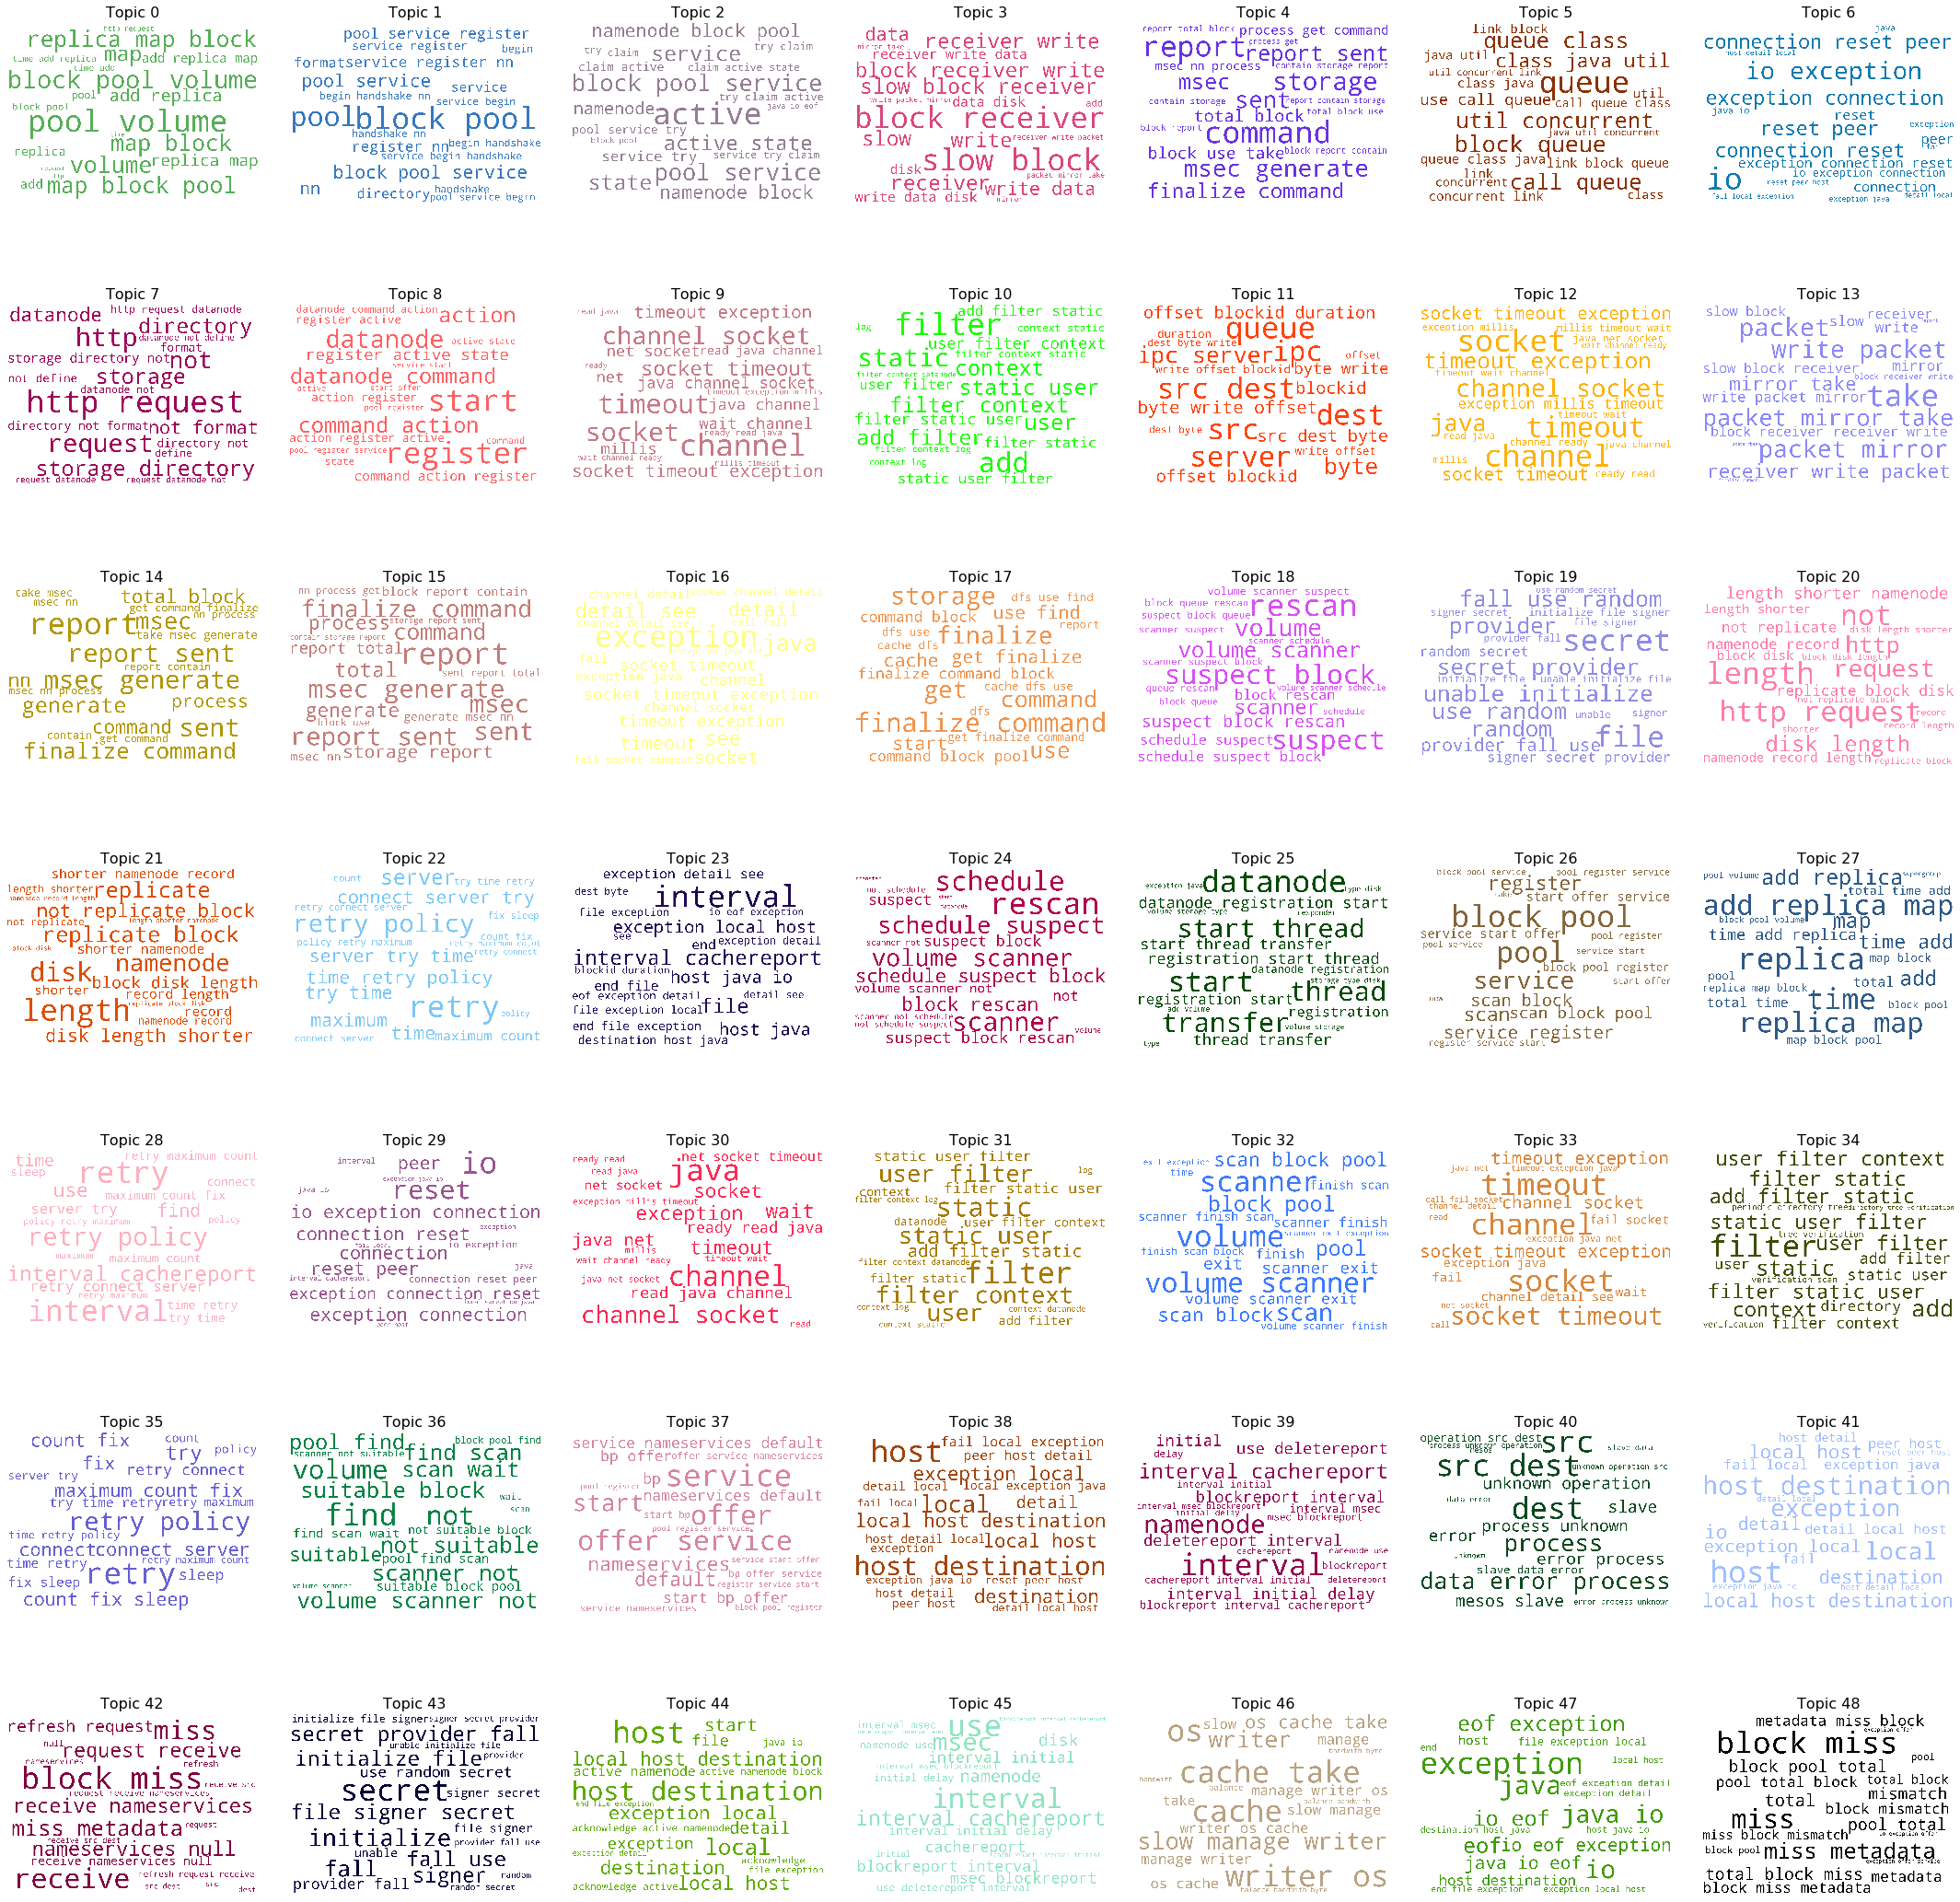

In [28]:
topics_words=WORDCLOUD(k,best_nmf_model,k,True)

### MERGE TOPICS

In [29]:
def TO_MERGE(similardf):
    sim=similardf.values
    el_merge={}
    for i in range(len(sim)):
        el_merge[i]=[]
    for i,row in enumerate(sim):
        #print(i,"ROW")
        sim_val=[]
        for j,el in enumerate(row):
            if el>0.85 and j<i:
                #print("\t",i,"-",j,el)
                sim_val.append(j)
        for el1 in sim_val:
            #print("\t\t",el1)
            #if len(el_merge[el1])==0:
            el_merge[el1].append(i)
            #print("\t\tACT STATE",el1,el_merge[el1])
            break
    print("TO_MERGE")
    to_merge=[]
    for k,v in el_merge.items():
        if len(v)>0:
            v.append(k)
            v=sorted(v)
            to_merge.append((v))
            print((v))
    return to_merge

In [30]:
def MERGED_TOPICS(w2v,to_merge,to_drop,modelW2V):
    merged_topics=[]
    tm_processed=[]
    tot_merge=[]
    for el in to_merge:
        tot_merge=tot_merge+el
    print("STARTING LEN",len(w2v))
    for i,tp in enumerate(w2v):
        if i not in tot_merge:
            print("ADDING",i)
            merged_topics.append(tp)
        else:
            new_topic=[]
            to_add={}
            flag=False
            for j,tm in enumerate(to_merge):
                if i in tm and j not in tm_processed: #VEDO SE TOPIC i E' DA UNIRE E SE LA LISTA DI TO_MERGE NON e' GIa' STATA PROCESSATA
                    flag=True
                    for topic_idx in tm:
                        if i!=topic_idx:
                            print(i,topic_idx)
                            for word in w2v[topic_idx]:
                                if word not in to_add.keys():
                                    #print(word,1)
                                    to_add[word]=1
                                else:
                                    #print(word,to_add[word]+1)
                                    to_add[word]+=1
                    tm_processed.append(j) #INDICO QUELLA LISTA PROCESSATA
            print(i,flag)
            if flag:
                print("LIST PROCESSED",tm_processed)
                last_proc=to_merge[tm_processed[-1]]
                print("LAST LIST PROCESSED",last_proc)
                #print("----------------------------------")
                #print("TO_ADD:")
                for k,v in to_add.items():
                    #print(k,v)
                    if v+1==len(last_proc):
                        new_topic.append(k)
                #print("----------------------------------")
                print("LEN NEW TP",len(new_topic))
                print("ACT NEW TP",new_topic)
                num_el_still_add=20-len(new_topic)
                print("LEN TOT", len(to_add))
                
                if num_el_still_add == 0:
                    print(f"CURR LEN MERGED_TOPICS: {len(merged_topics)}")
                    merged_topics.append(w2v[i])
                    print(f"CURR LEN MERGED_TOPICS: {len(merged_topics)} AFTER ADDED {i}")
                else:
                    diz_keep={}
                    for k,v in to_add.items():
                        #print(k,v)
                        if v+1!=len(last_proc):
                            tot_sim=0
                            curr_v=modelW2V[k]
                            for word in new_topic:
                                act_v=modelW2V[word]
                                similarity=spatial.distance.cosine(curr_v, act_v)
                                tot_sim+=similarity
                            if k not in diz_keep.keys():
                                diz_keep[k]=tot_sim

                    sort_diz = dict( sorted(diz_keep.items(), key=operator.itemgetter(1),reverse=True))
                    print(sort_diz)
                    it=0
                    added_el=[]
                    for k,v in sort_diz.items():
                        print(k,v)
                        if it<num_el_still_add:
                            print("ADDING",k)
                            added_el.append(k)
                            new_topic.append(k)
                        it+=1
                    print("ADDED ELEMENT:",added_el)
                    print("FINAL NEW_TOPIC:",new_topic, len(new_topic))
                    merged_topics.append(new_topic)
                    print("\n")

    print(len(merged_topics))
    return merged_topics

In [ ]:
w2v=[]
for tw in topics_words:
    tmp=[]
    for el in tw:
        splits=el.split(" ")
        tmp.append("_".join(splits))
    #print(tmp)
    w2v.append(tmp)

In [ ]:
delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V, k)
print(f"k={k}, coherence={coherence}, to_drop={to_drop}")

In [ ]:
delta_k=1
while delta_k!=0:
    print("\nTO_DROP",to_drop)
    to_merge=TO_MERGE(similardf)
    merged_topics=MERGED_TOPICS(w2v,to_merge,to_drop,modelW2V)
    cm = CoherenceModel(topics=merged_topics, texts = data, corpus=corpus, dictionary=id2word, coherence = "c_v")
    coherence = cm.get_coherence() 
    print(f"COHERENCE - {len(merged_topics)}: {coherence}")
    w2v=merged_topics
    delta_k, to_drop,similardf=CLUSTERSIMILARITY(w2v, modelW2V, k)


In [ ]:
best_k=k

In [ ]:
################## WORD COUNT AND IMPORTANCE ##########################

from collections import Counter

topics = best_nmf_model.show_topics(num_topics=best_k,formatted=False)
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
#print(df)

# Plot Word Count and Weights of Topic Keywords
plot_size=int(np.ceil(np.sqrt(best_k)))
fig, axes = plt.subplots(plot_size, plot_size, figsize=(30,30), sharey=True, dpi=160)
tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
offset=int(len(tmp)/best_k)
print(offset)
cols=tmp[1::offset]
print(cols)

axes=axes.flatten()
for i in range(best_k):
    ax=axes[i]
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.010); ax.set_ylim(0, 1000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left')
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=1)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.savefig(currdir+path+f"{name}_{tipo}_WORD_COUNT_IMPORTANCE.png")
plt.show()

In [75]:
f=open(currdir+f"/INPUT/{name}/{tipo}/{name}_Raw_{tipo}.txt","r")
lines=f.readlines()
originals=[]
for i,line in enumerate(lines):
    line=line.rstrip("\n")
    print(i,line)
    originals.append(line)
f.close()
print(len(originals))

0 attempt_201706091116_0204_m_000033_8190: Committed
1 BlockManager stopped
2 Block broadcast_9_piece0 stored as bytes in memory (estimated size 5.2 KB, free 5.2 KB)
3 Block broadcast_9 stored as values in memory (estimated size 8.8 KB, free 13.9 KB)
4 Changing modify acls to: yarn,curi
5 Changing view acls to: yarn,curi
6 Connecting to driver: spark://CoarseGrainedScheduler@10.10.34.11:59027
7 Created local directory at /opt/hdfs/nodemanager/usercache/curi/appcache/application_1485248649253_0137/blockmgr-e0cc101a-3e87-49b4-bf34-43da6bb84e76
8 Deleting directory /opt/hdfs/nodemanager/usercache/curi/appcache/application_1485248649253_0137/spark-85028744-5346-4699-8045-426bb7913c2a
9 Driver commanded a shutdown
10 Driver 10.10.34.11:59027 disassociated! Shutting down.
11 File Output Committer Algorithm version is 1
12 Finished task 15.0 in stage 0.0 (TID 15). 2697 bytes result sent to driver
13 Found block rdd_2_33 locally
14 Got assigned task 6
15 Input split: hdfs://10.10.34.11:9000/pj

In [76]:
###################### SENTENCE TOPIC DOMINANCE ###############################
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data, raw=originals):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list#[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                orig=raw[i]
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords, orig]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Raw']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_nmf_model, corpus=corpus, texts=data, raw=originals)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Raw','Text']
df_dominant_topic.to_csv(currdir+path+f"{name}_NMF_RESULTS_{tipo}.csv")
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Raw,Text
0,0,30.0,0.1763,"task, mapreduce task, use mapreduce task, mapr...",attempt_201706091116_0204_m_000033_8190: Commi...,"[attempt, commit, attempt commit]"
1,1,8.0,0.1803,"block, store, memory, block store, manager, bl...",BlockManager stopped,"[block, manager, stop, block manager, manager ..."
2,2,8.0,0.1951,"block, store, memory, block store, manager, bl...",Block broadcast_9_piece0 stored as bytes in me...,"[block, store, byte, memory, block store, stor..."
3,3,8.0,0.2720,"block, store, memory, block store, manager, bl...",Block broadcast_9 stored as values in memory (...,"[block, store, value, memory, block store, sto..."
4,4,28.0,0.2342,"yarn curi, acls yarn curi, yarn, curi, acls ya...","Changing modify acls to: yarn,curi","[change, modify, acls, yarn, curi, change modi..."
5,5,16.0,0.2244,"acls yarn curi, acls, curi, yarn, change, yarn...","Changing view acls to: yarn,curi","[change, view, acls, yarn, curi, change view, ..."
6,6,29.0,0.1934,"driver, block, register, block manager, shutdo...",Connecting to driver: spark://CoarseGrainedSch...,"[connect, driver, connect driver]"
7,7,4.0,0.2227,"user, set, disable acls, disable, permission, ...",Created local directory at /opt/hdfs/nodemanag...,"[create, local, directory, create local, local..."
8,8,25.0,0.2770,"task, partition, task partition, use mapreduce...",Deleting directory /opt/hdfs/nodemanager/userc...,"[delete, directory, delete directory]"
9,9,37.0,0.1363,"boot init, time, time total boot, total boot, ...",Driver commanded a shutdown,"[driver, command, shutdown, driver command, co..."


In [ ]:
##################### SENTENCE CHART TOPIC COLOR ######################################
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=best_nmf_model, corpus=corpus, start = 0, end = 45):
    corp = corpus[start:end]
    tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    offset=int(len(tmp)/best_k)
    print(offset)
    mycolors=tmp[1::offset]
    print(cols)

    fig, axes = plt.subplots(end-start, 1, figsize=(30, (end-start)*0.95), dpi=150)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        ax.axis("off")
        if i > 0:
            corp_cur = corp[i-1] 
            #print(corp_cur)
            topic_percs = lda_model[corp_cur]
            #print(topic_percs)
            #wordid_topics = 
            word_dominanttopic=[]
            for id,f in corp_cur:
                w=lda_model.id2word[id]
                t=lda_model.get_term_topics(id)
                #print(w,f,t)
                #print("\n")
                if len(t)>0:
                    word_dominanttopic.append((w,t[0][0]))
            #print(lda_model.get_document_topics(corp_cur))
            #word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.3, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    mul=len(word)
                    if len(word)>15:
                        mul=mul/1.1
                    word_pos += .005 * mul  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.99, x=0.5, fontweight=700)
    plt.tight_layout()
    plt.savefig(currdir+path+f"{name}_{tipo}_NMF_SENTENCE_CHART_TOPIC_COLOR.png")
    plt.show()

sentences_chart()    

In [ ]:
tpcs=df_dominant_topic['Dominant_Topic'].values.tolist()
print(type(tpcs))
topics=[]
for tp in tpcs:
    topics.append(int(tp))
print(topics)
tp_set=set(topics)
print(tp_set)

In [ ]:
############################### T-SNE  ###################################

# Get topic weights
topic_weights = []
for i, row_list in enumerate(best_lda_model[corpus]):
    #print(row_list)
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values
print(arr.shape)

# Keep the well separated points (optional)
#arr = arr[np.amax(arr, axis=1) > 0.35]
print(arr.shape)

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)
print(tsne_lda.shape)
print(type(tsne_lda))

tmp = [color for name, color in mcolors.XKCD_COLORS.items()]#mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
print("TMP",len(tmp))
offset=int(len(tmp)/100)
#print(offset)
mycolors=tmp[1::offset]
customPalette=sns.set_palette(sns.color_palette(mycolors, as_cmap=True))
print(mycolors)

print(len(topics))
df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_lda[:,0]
df_subset['tsne-2d-two'] = tsne_lda[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=topics,
    palette=sns.color_palette(mycolors, 17),#sns.color_palette("PRGn",100, as_cmap=True),
    data=df_subset,
    legend="full",
    alpha=1,
    s=100
)
plt.savefig(f"{name}_{tipo}_TSNE.png")
